In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math 

In [2]:
suv_df = pd.read_csv("suv_data.csv")

In [3]:
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv_df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
suv_df.shape

(400, 5)

In [6]:
suv_df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
suv_df.index

RangeIndex(start=0, stop=400, step=1)

In [8]:
#Analyzing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

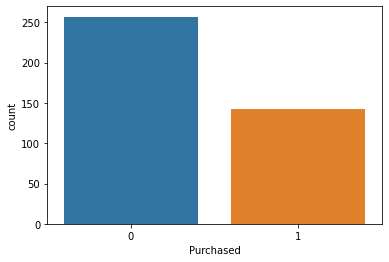

In [9]:
sns.countplot(x="Purchased",data=suv_df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

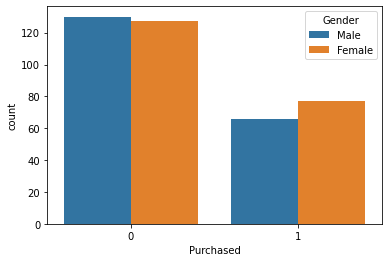

In [10]:
sns.countplot(x='Purchased', hue='Gender', data=suv_df)

In [11]:
suv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
#Data Wrangling

In [13]:
suv_df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [14]:
suv_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

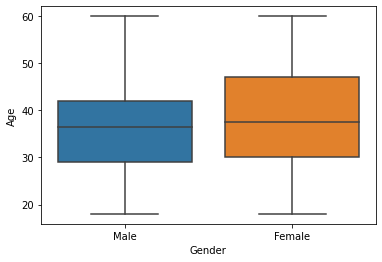

In [15]:
sns.boxplot(x='Gender', y='Age', data=suv_df)

In [16]:
suv_df1 = pd.get_dummies(suv_df['Gender'],drop_first=True)

In [17]:
suv_df1.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [18]:
suv_df = pd.concat([suv_df,suv_df1],axis=1)

In [19]:
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [20]:
suv_df.drop(['Gender'],axis=1, inplace=True)

In [21]:
suv_df

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [22]:
#Train and Test Data

In [23]:
X = suv_df.drop('Purchased',axis=1)
y = suv_df["Purchased"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions = model.predict(X_test)

In [29]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.99      0.89        80\n           1       0.97      0.63      0.77        52\n\n    accuracy                           0.85       132\n   macro avg       0.89      0.81      0.83       132\nweighted avg       0.87      0.85      0.84       132\n'

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, predictions)

array([[79,  1],
       [19, 33]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, predictions)

0.8484848484848485

In [34]:
accuracy_score(y_test, predictions)*100

84.84848484848484